In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import norm
from sklearn.metrics import f1_score

# Wczytaj dane
data = loadmat('ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']

# Rozmiar danych
print("Rozmiar X :", X.shape)  # (307, 2)
print("Rozmiar Xval:", Xval.shape)  # (307, 2)
print("Rozmiar yval:", yval.shape)  # (307, 1)
#X to 307 próbek, każda z 2 cechami
#Xval to 307 próbek walidacyjnych, każda z 2 cechami
#yval to 307 etykiet klas (0 lub 1)

Rozmiar X : (307, 2)
Rozmiar Xval: (307, 2)
Rozmiar yval: (307, 1)


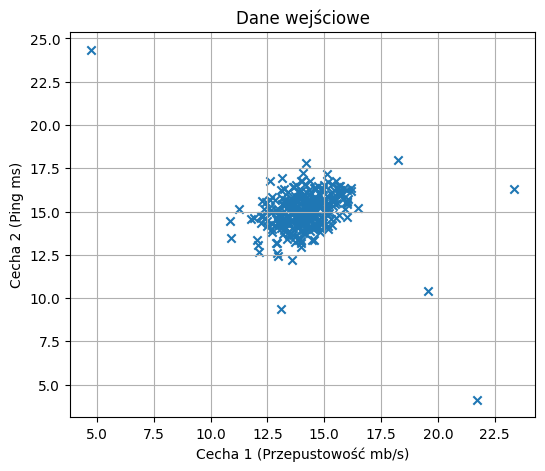

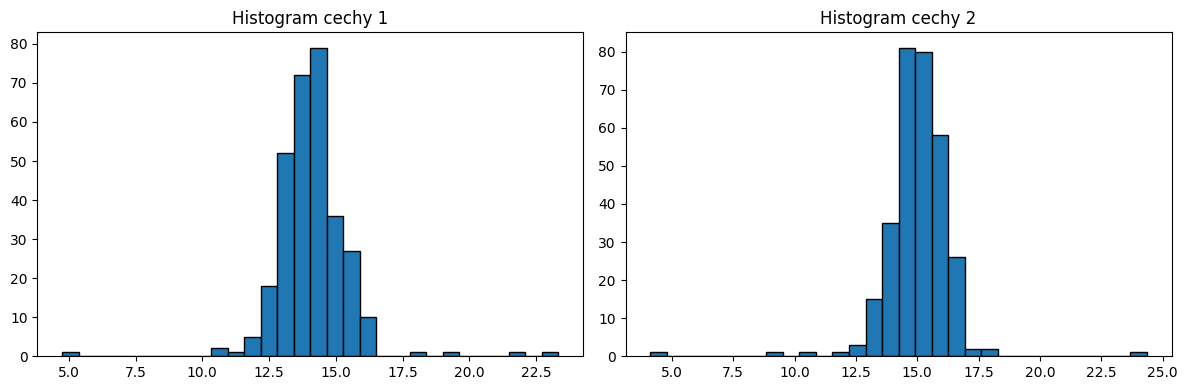

In [16]:
# Wykres punktowy
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], marker='x')
plt.xlabel('Cecha 1 (Przepustowość mb/s)')
plt.ylabel('Cecha 2 (Ping ms)')
plt.title('Dane wejściowe')
plt.grid(True)
plt.show()

# Histogramy dla obu cech
plt.figure(figsize=(12, 4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i], bins=30, edgecolor='black')
    plt.title(f'Histogram cechy {i+1}')
plt.tight_layout()
plt.show()


Rozkład Gausa

Średnia (mu): [14.11222578 14.99771051]
Odchylenie standardowe (sigma): [1.35374717 1.3075723 ]
Liczba próbek oznaczonych jako anomalie (yval==1): 9
pval: [0.04163207 0.08190901 0.04071578 0.06190003 0.07118676 0.04243449
 0.06020085 0.08403421 0.02108983 0.07699849]


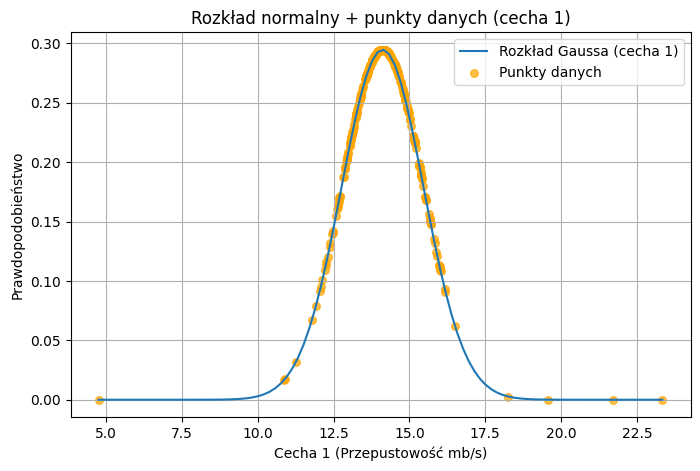

Najlepszy próg (epsilon): 8.999852631901394e-05
Najlepszy F1 score: 0.875


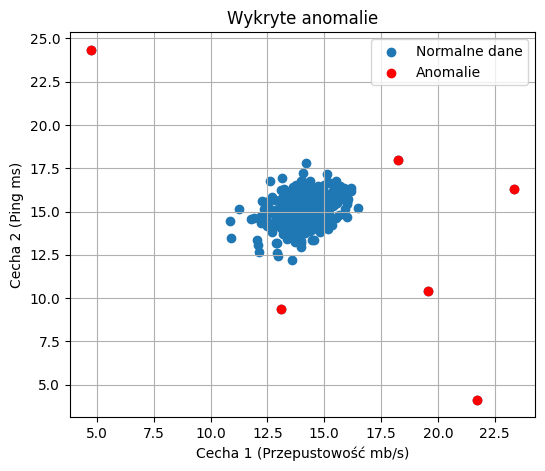

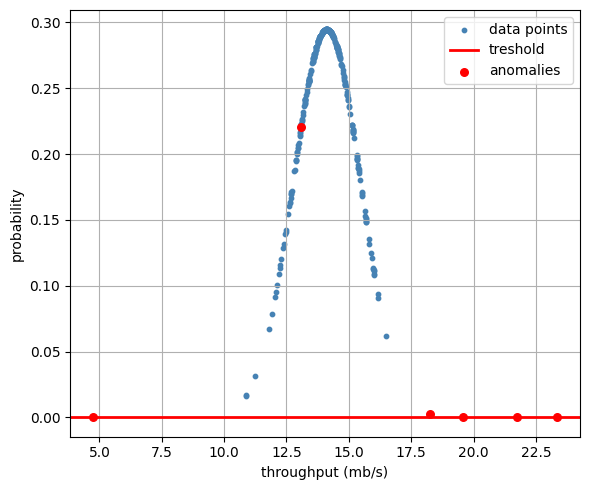

In [ ]:

# === 3. Estymacja parametrów rozkładu Gaussa ===
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=0)
    return mu, sigma

mu, sigma = estimate_gaussian(X)
print("Średnia (mu):", mu)
print("Odchylenie standardowe (sigma):", sigma)

# === 4. Obliczanie PDF ===
def calculate_pdf(X, mu, sigma):
    p = np.prod(norm.pdf(X, loc=mu, scale=sigma), axis=1)
    return p

pval = calculate_pdf(Xval, mu, sigma)
print("Liczba próbek oznaczonych jako anomalie (yval==1):", np.sum(yval == 1))
print("pval:", pval[:10])  # pierwsze 10 wartości PDF dla zbioru walidacyjnego
# === 5. Wykres rozkładu dla cechy 1 ===
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
pdf_vals = norm.pdf(x_vals, loc=mu[0], scale=sigma[0])
pdf_data_points = norm.pdf(X[:, 0], loc=mu[0], scale=sigma[0])  # wartości PDF dla danych

plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label='Rozkład Gaussa (cecha 1)')
plt.scatter(X[:, 0], pdf_data_points, color='orange', alpha=0.7, s=30, label='Punkty danych')
plt.title('Rozkład normalny + punkty danych (cecha 1)')
plt.xlabel('Cecha 1 (Przepustowość mb/s)')
plt.ylabel('Prawdopodobieństwo')
plt.grid(True)
plt.legend()
plt.show()

# === 6. Wybór najlepszego progu epsilon ===
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    epsilons = np.linspace(np.min(pval), np.max(pval), 1000)

    for eps in epsilons:
        predictions = (pval < eps)
        f1 = f1_score(yval, predictions)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = eps
    return best_epsilon, best_f1
#ktore nadzw
epsilon, f1 = select_threshold(pval, yval)
print("Najlepszy próg (epsilon):", epsilon)
print("Najlepszy F1 score:", f1)

# === 7. Wykrywanie anomalii w zbiorze X ===
p = calculate_pdf(X, mu, sigma)
anomalies = X[p < epsilon]

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], label='Normalne dane')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', label='Anomalie')
plt.xlabel('Cecha 1 (Przepustowość mb/s)')
plt.ylabel('Cecha 2 (Ping ms)')
plt.title('Wykryte anomalie')
plt.legend()
plt.grid(True)
plt.show()

# Przygotowanie wartości
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
pdf_vals = norm.pdf(x_vals, loc=mu[0], scale=sigma[0])
pdf_data_points = norm.pdf(X[:, 0], loc=mu[0], scale=sigma[0])  # PDF-y dla danych

# Wyznaczenie anomalii
p_all = calculate_pdf(X, mu, sigma)
anomalie_idx = p_all < epsilon

# Rysowanie wykresu
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], pdf_data_points, s=10, c='steelblue', label='data points')
plt.axhline(y=epsilon, color='red', linewidth=2, label='treshold')
plt.scatter(X[anomalie_idx, 0], pdf_data_points[anomalie_idx], c='red', s=30, label='anomalies')
plt.xlabel('throughput (mb/s)')
plt.ylabel('probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Poprawny wynik dla wczytanego zbioru danych: (array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))

